# CS-290 - Graded Assignment 1 - 15.10.2024

<div style="border-left: 6px solid rgba(200, 60, 60, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(200, 60, 60, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Overall instructions</p>
    <div style="padding: 0 0 2px 10px;">

The notebook contains **2 independent exercises** of **15 points each**:
* [Exercise 1: Healthcare program admission](#Exercice-1:-Healthcare-program-admission): 12 questions
* [Exercise 2: Heart fairlure prediction](#Exercice-2:-Heart-failure-prediction): 14 questions

For each question, we indicate the number of corresponding points.  
You will find **two types of graded questions**:
* Programming questions ;
* Ethical reflection questions: these can be single choice or open.  
  For the open questions, we provide an **indicative length** of text you are expected to write.

**Read carefully the text and instructions.**  
A lot of information is provided in the text. Take your time to understand the problem and the data.

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important !  
To avoid inconsistent states, make sure to regularly restart the kernel and re-execute cells from top to bottom.  
For that, you can use the menu `Kernel` > `Restart Kernel...` or `Restart Kernel and run up to Selected Cell`.

Make sure to regularly **save your work** either by clicking on the floppy icon (💾) at the top of the notebook, clicking on the menu `File > Save Notebook` or by using the keyboard shortcut `Ctrl+S`.

</div></div>

Notebook by Mattéo Berthet and the Responsible software TAs team (2024).<br/>

Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

## Exercice 1: Healthcare program admission (15 points)

**Overview:**  
[1.1 - Introduction](#1.1---Introduction)  
[1.2 - Analysis](#1.2---Analysis)  
[1.3 - Fairness of the admission system](#1.3---Fairness-of-the-admission-system)

### 1.1 - Introduction

In this exercise, you are tasked with developing an admission algorithm for a healthcare program.  
The objective is to select the patients who will benefit the most from an intervention program. This type of program aims to improve the care of patients with complex health needs by providing additional resources, such as dedicated nurses, extra primary care appointments, and other limited resources. The ultimate goal is to reduce the cost of care by preventing costly hospitalizations and emergency department visits in the future.

You are provided with a dataset derived from a real-world case study with the following information:
- `Race`: Either `Black` or `White` (for the purpose of this notebook, only patients identifying as Black or White from the original dataset have been included.)
- `Age`: The age of the patient
- `Active illnesses`: The number of chronic illnesses the patient has (defined as conditions lasting 3 months or longer that tend to worsen over time. Chronic diseases, which are common in older adults, can often be controlled but not cured. Examples include cancer, heart disease, stroke, diabetes, and arthritis - per the USA National Cancer Institute.)
- `Biological sex`: Either `M` or `F`
- `Actual cost`: The cost of healthcare in USD

It is important to note that every patient in the dataset has insurance, and the cost of healthcare is fully covered by the insurance.  
However, only 3% of the patients in the dataset can be admitted to the program, as the program has limited resources and can admit only a small number of patients.

The goal of this exercise is to develop an algorithm that will select the patients who will be admitted to the program.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the libraries and the dataset.

</div></div> 

In [1]:
import pandas as pd
import numpy as np
import math
import os
import warnings
import math

from res.utils import *

np.random.seed(42)
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv(os.path.join('dataset', 'health_care_program.csv'))
df.head()

Biological sex  Age  Active illnesses  Actual cost   Race      Id
0              F   37                 0         1048  White  468684
1              F   43                 0         3344  White   44095
2              F   58                 1         5708  White  706277
3              F   43                 0         1178  Black  494659
4              M   41                 0         1930  White  218917

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Questions 1.1.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Compute the number of patients in the dataset, and the means of the `Actual cost` and `Active illnesses` columns for white and black patients separately.

Complete the cell below.
</div></div> 

In [2]:
number_patients = df.shape[0] # SOLUTION

mean_white_cost = df[df["Race"] == "White"]["Actual cost"].mean() # SOLUTION

mean_white_illness = df[df["Race"] == "White"]["Active illnesses"].mean() # SOLUTION

mean_black_cost = df[df["Race"] == "Black"]["Actual cost"].mean() # SOLUTION

mean_black_illness = df[df["Race"] == "Black"]["Active illnesses"].mean() # SOLUTION

print(f"Number of patients: {number_patients}")
print(f"White patients: mean cost = {mean_white_cost : .3f}")
print(f"Black patients: mean cost = {mean_black_cost : .3f}")
print(f"White patients: mean illnesses = {mean_white_illness :.3f}")
print(f"Black patients: mean illnesses = {mean_black_illness : .3f}")

Number of patients: 49000
White patients: mean cost =  8366.674
Black patients: mean cost =  7372.051
White patients: mean illnesses = 1.152
Black patients: mean illnesses =  1.146


We provide the following tests to help you check that the values you obtain are of the right type.  
These tests do not guarantee that your code is correct. Make sure to run some tests on your side.

In [3]:
assert isinstance(number_patients, int)
assert (number_patients > 40000) & (number_patients < 50000)
assert isinstance(mean_white_cost, float)
assert isinstance(mean_white_illness, float)
assert isinstance(mean_black_cost, float)
assert isinstance(mean_black_illness, float)

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.1.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
         
Is there an important difference of sickness for black and white patient?  
Assign the variable `difference_sickness` below a value of 1 for yes, 0 for no. Example: `difference_sickness = 1` or `difference_sickness = 0`.

Complete the cell below.
</div></div>

In [4]:
difference_sickness = 0 # SOLUTION

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.1.3 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
In order to find the 3% of patients who will benefit the most from the intervention program, you will need to compute a risk score for each patient. The higher a patient's score, the more likely they are to benefit from the intervention program. The score should be calculated as follows:
- a weight of 0.15 for `Active illnesses`
- a weight of 0.30 for `Age`
- a weight of 0.55 for the `Actual cost`

You need to normalize `Active illnesses`, `Age` and `Actual cost` columns before calculating the score. To normalise you need to divide by the mean of the column. /!\\ Don't modify the original columns.

You can interpret it this way:
- Patients with more active illnesses are more likely to require additional care and healthcare resources.
- Older patients require more attention and care as they tend to be more fragile.
- Patients with high costs are likely to incur significant expenses for insurance. It is more cost-effective to intervene early rather than waiting until their condition worsens, which would result in even higher costs. 

The column `Score` is the sum of the weighted and normalized values for each patient. $$ \text{Score} = \text{weight}_1 \times \text{column normalized}_1 + \text{weight}_2 \times \text{column normalized}_2 + \text{...} + \text{weight}_n \times \text{column normalized}_n $$

Complete the cell below.
</div></div> 

In [5]:
# Generate score
mean_illness = df["Active illnesses"].mean() # SOLUTION
mean_age = df["Age"].mean() # SOLUTION
mean_cost = df["Actual cost"].mean() # SOLUTION

df["Score"] = 0.15 * df["Active illnesses"]/mean_illness + 0.30 * df["Age"]/mean_age + 0.55 * df["Actual cost"]/mean_cost # SOLUTION

df.head()

Biological sex  Age  Active illnesses  Actual cost   Race      Id     Score
0              F   37                 0         1048  White  468684  0.287886
1              F   43                 0         3344  White   44095  0.476395
2              F   58                 1         5708  White  706277  0.852785
3              F   43                 0         1178  Black  494659  0.331906
4              M   41                 0         1930  White  218917  0.370287

The following cell ranks the patients based on their risk score and compute in which percentile they are. If their percentile is 97, it means they are among the 3% of the patients with the highest risk. The 97th, 98th and 99th percentile will be the patients who will benefit the most from the intervention program. We create another column "Admitted" to indicate that those patients are admitted to the program. (1 for admitted, 0 for not admitted)

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below see the resulting dataframe.

</div></div> 

In [6]:
# Generate percentile
df["Percentile"] =  pd.qcut(df["Score"], 100, labels=False)

df["Admitted"] = df["Percentile"].apply(lambda x: 1 if x >=97 else 0)

df.head()

Biological sex  Age  Active illnesses  Actual cost   Race      Id     Score  \
0              F   37                 0         1048  White  468684  0.287886   
1              F   43                 0         3344  White   44095  0.476395   
2              F   58                 1         5708  White  706277  0.852785   
3              F   43                 0         1178  Black  494659  0.331906   
4              M   41                 0         1930  White  218917  0.370287   

   Percentile  Admitted  
0           1         0  
1          27         0  
2          58         0  
3           4         0  
4           9         0

### 1.2 - Analysis

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Calculate the disparate impact ratio for the patients who are admitted to the program: first calculate the proportion of black and white patients who are admitted, then calculate the disparate impact ratio. The result should be between 0 and 1.

Complete the cell below.
</div></div> 

In [7]:
number_white_admitted = df[df["Admitted"] == 1]["Race"].value_counts().get("White", 0) # SOLUTION
number_black_admitted = df[df["Admitted"] == 1]["Race"].value_counts().get("Black", 0) # SOLUTION

size_white_dataset = df["Race"].value_counts().get("White", 0) # SOLUTION
size_black_dataset = df["Race"].value_counts().get("Black", 0) # SOLUTION

prop_admitted_white = number_white_admitted / size_white_dataset # SOLUTION
prop_admitted_black = number_black_admitted / size_black_dataset # SOLUTION

disparate_impact_ratio = prop_admitted_black / prop_admitted_white # SOLUTION

print(f"Proportion admitted black: {prop_admitted_black: .4f}")
print(f"Proportion admitted white: {prop_admitted_white: .4f}")
print(f"Disparate impact ratio: {disparate_impact_ratio: .4f}")

Proportion admitted black:  0.0107
Proportion admitted white:  0.0327
Disparate impact ratio:  0.3262


We provide the following tests to help you check that the values you obtain are in the right interval.  
These tests do not guarantee that your code is correct. Make sure to run some tests on your side.

In [8]:
assert (prop_admitted_white >= 0.0) & (prop_admitted_white <= 1.0)
assert (prop_admitted_black >= 0.0) & (prop_admitted_black <= 1.0)
assert (disparate_impact_ratio >= 0.0) & (disparate_impact_ratio <= 1.0)

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.2 (2 points)</p>
    <div style="padding: 0 0 2px 10px;">

Interpret the disparate impact ratio you calculated: what does it mean for the patients?  
Explain your interpretation citing the data you obtained (2 sentences).

Complete the cell below.

</div></div> 

We plot the score percentiles for black and white patients. We focus on the admitted patients (on the right of the black dashed line wich represents the 97th percentile ). White patients are represented by the blue line with crosses and black patients by the red line with dots.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below see the graphs.
</div></div> 

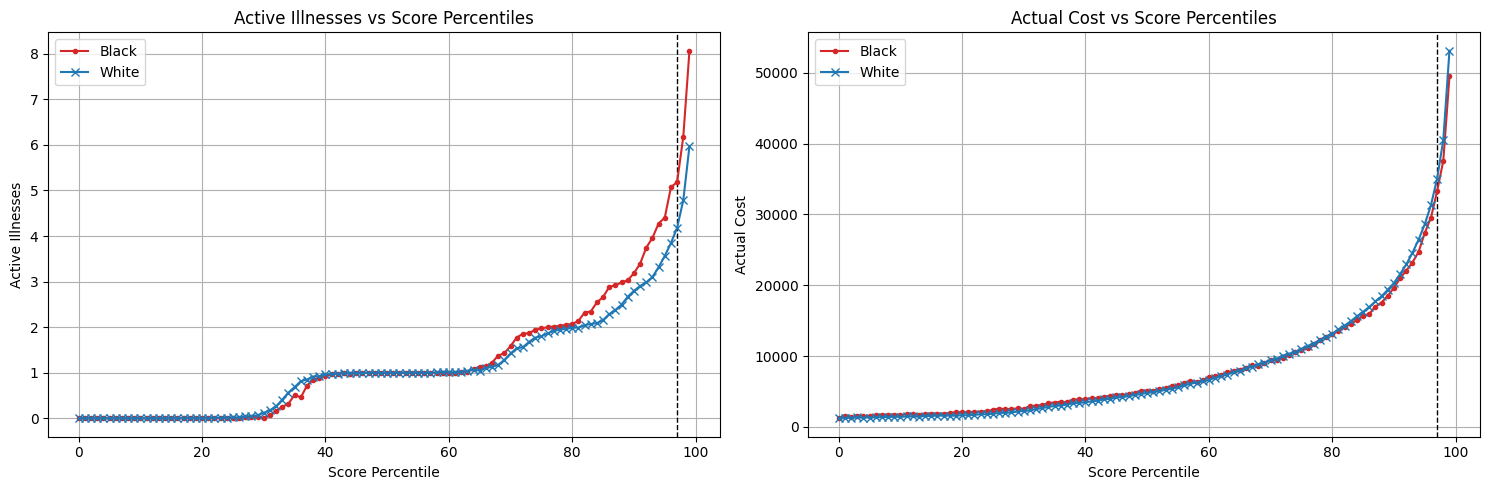

In [9]:
plot_percentile_illnesses_cost(df)

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.3 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
For the admitted group, compare the number of active illnesses and the cost of healthcare of black and white patients for a same risk score.  
Describe what you see (1 sentence).

Complete the cell below.

</div></div> 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.4 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Is there a difference of health condition between black and white patients when admitted to the program?  
Justify your answer using supporting information from the graph (2 sentences).


Complete the cell below.
</div></div> 

We now plot the actual cost of healthcare against the number of active illnesses for all patients. White patients are represented in blue with crosses and black patients in red with dots.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below see the graph.
</div></div> 

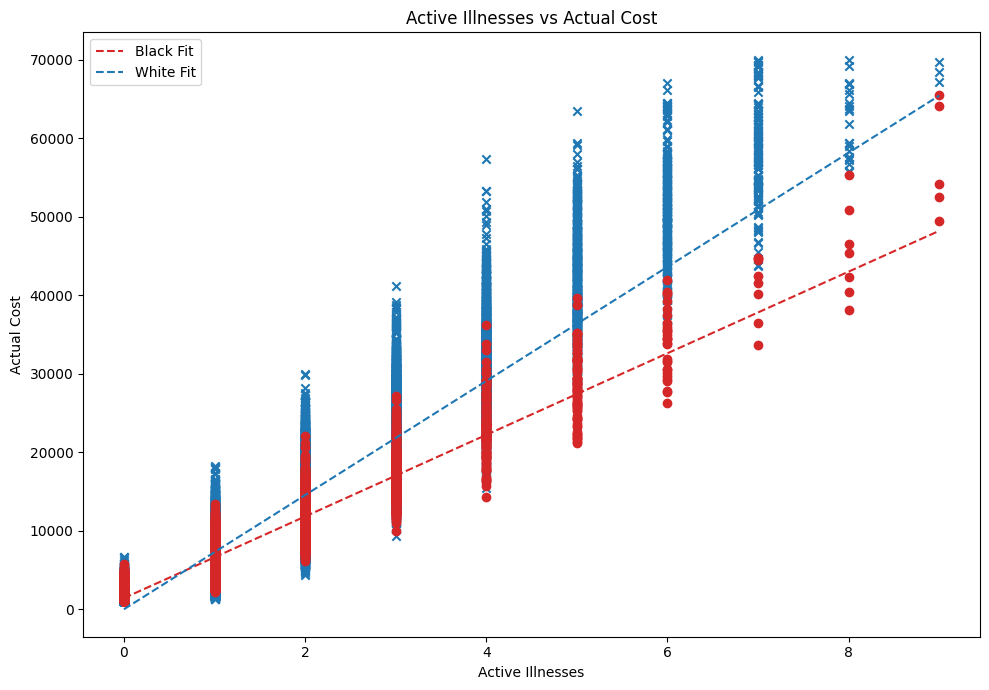

In [10]:
plot_illnesses_cost(df)

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.5 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Compare and contrast the number of active illnesses and healthcare costs of black patients to that of white ones.  
Describe what you see on the graph and how you interpret it (2 sentences).

Complete the cell below.

</div></div> 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.6 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
How can you explain this difference from a socio-economic point of view? We recall that this dataset is derived from the USA. Give at least 1 reason.

Complete the cell below.
</div></div> 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.2.7 (2 points)</p>
    <div style="padding: 0 0 2px 10px;">
        
Which column of the dataset is a proxy of the patient's race?  
Review all your analysis from the beggining and feel free to do other analyses if you want (for example 1.1.3) (/!\\ DON'T FORGET TO PUT BACK THE ORIGINAL VALUES) 

Complete the cell below.
</div></div> 

### 1.3 - Fairness of the admission system

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.3.1 (2 points)</p>
    <div style="padding: 0 0 2px 10px;">
        
Is this algorithm fair? If it is not fair, which group does it favour?  
Justify your answer (2-3 sentences, citing data from the analysis above).  


Complete the cell below.
</div></div> 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 1.3.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
 If you answered no to 1.3.1, propose one solution to improve it. What could be the drawback of this solution? (2 sentences)

Complete the cell below.
</div></div> 

---

## Exercice 2: Heart failure prediction (15 points)

**Overview:**  
[2.1 - Introduction](#2.1---Introduction)  
[2.2 - First classifier - Logistic Regression Classifier](#2.2---First-classifier---Logistic-Regression-Classifier)  
[2.3 - Second classifier - Random Forest Classifier](#2.3---Second-classifier---Random-Forest-Classifier)  
[2.4 - Interpretation](#2.4---Interpretation)

### 2.1 - Introduction

The goal of this exercice is to predict if a patient will have a heart failure to be able to provide appropriate care, including medication and monitoring through blood tests and wearable devices, to help prevent it from occurring.  

The prediction is based on blood analysis and commorbidities (diabetes, smoking, anemia).

You are provided with a dataset with the following features: `age`,`anaemia`,`creatinine_phosphokinase`,`diabetes`,`ejection_fraction`,`high_blood_pressure`,`platelets`,`serum_creatinine`,`serum_sodium`,`sex`, `smoking` 

In this exercise, you will be given two classifiers to predict a heart failure. The first classifier is a logistic regression and the second one is a random forest classifier.  
Your task is to compare the performance of the two classifiers.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the libraries.

</div></div> 

In [11]:
import warnings
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from res.utils import *

warnings.filterwarnings("ignore")
np.random.seed(42)

In the following dataset, we consider a heart failure the positive event (1) and no heart failure the negative event (0).

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the dataset.

</div></div> 

In [12]:
features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex', 'smoking']


heart_data = pd.read_csv(os.path.join('dataset', 'heart_failure_clinical_records_dataset.csv'))[[*features, 'heart_failure']]

x = heart_data
y = heart_data["heart_failure"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

heart_data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  heart_failure  
0        0              1  
1        0              1  
2        1              1  
3        0              1  
4        0              1

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.1.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Compute the heart failure ratio based on the column `heart_failure`, where 1 indicates patients who have had heart failure and 0 indicates patients who have not had heart failure: first compute the total number of heart failure events and then the ratio.

Complete the cell below.
</div></div> 

In [13]:
number_heart_failure_events = heart_data['heart_failure'].value_counts()[1] # SOLUTION
ratio_heart_failure = number_heart_failure_events / len(heart_data) # SOLUTION

print("Number of heart failure events: ", number_heart_failure_events)
print("Percentage of heart failure events: ", round(ratio_heart_failure, 3)*100, "%")

Number of heart failure events:  96
Percentage of heart failure events:  32.1 %


We provide the following tests to help you check that the values you obtain are in the right interval.  
These tests do not guarantee that your code is correct. Make sure to run some tests on your side.

In [14]:
assert (number_heart_failure_events > 0)
assert (ratio_heart_failure > 0.0) & (ratio_heart_failure <= 1.0)

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.1.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Is the dataset balanced ?
Assign the variable `is_balanced` below a value of 1 for yes, 0 for no. Example: `is_balanced = 1` or `is_balanced = 0`.

Complete the cell below.
</div></div> 

In [15]:
is_balanced = 0 # SOLUTION

In addition, we also have access to the ground truth of the test dataset, which is the actual outcome of the patient.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the patient outcomes (ground truth).

</div></div> 

In [16]:
ground_truth = y_test.values.squeeze()
ground_truth

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

**Now let's analyse the two classifiers: for each one, you will compare its predictions with the ground truth using different metrics.**

### 2.2 - First classifier - Logistic Regression Classifier

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the output of the model.

</div></div> 

In [17]:
# We give the output of the model but if you want in the future you can test it by yourself

# log_reg = LogisticRegression()
# log_reg.fit(x_train, y_train)
# log_reg_pred = log_reg.predict(x_test)

log_reg_pred = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

log_reg_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In a first step, **let's develop the functions that we need to compute the metrics**.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.2.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Complete the function for computing the accuracy score

Complete the cell below.
</div></div> 

In [18]:
def accuracy_score(y_true, y_pred):
    '''
    y_true: np.array, true labels
    y_pred: np.array, predicted labels
    return: float, accuracy score (between 0 and 1)
    '''
    accuracy_score = np.mean(y_true == y_pred) # SOLUTION
    return accuracy_score

We provide the following test to help you check that the value you obtain is in the right interval.  
This test does not guarantee that your code is correct. Make sure to run some tests on your side.

In [19]:
assert 0 <= accuracy_score(np.array([0, 1, 1]), np.array([0, 1, 1])) <= 1

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.2.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Complete the function to compute tp (true positive), tn (true negative), fp (false positive), fn (false negative)

Complete the cell below.
</div></div> 

In [20]:
def compute_confusion_matrix(y_true, y_pred):
    '''
    y_true: np.array, true labels
    y_pred: np.array, predicted labels
    '''
    tp = np.sum((y_true == 1) & (y_pred == 1)) # SOLUTION
    tn = np.sum((y_true == 0) & (y_pred == 0)) # SOLUTION
    fp = np.sum((y_true == 0) & (y_pred == 1)) # SOLUTION
    fn = np.sum((y_true == 1) & (y_pred == 0)) # SOLUTION
    return tp, tn, fp, fn

We provide the following test to help you check that the sum of the confusion matrix is equal to the number of samples.  
This test does not guarantee that your code is correct. Make sure to run some tests on your side.

In [21]:
assert sum(compute_confusion_matrix(np.array([1, 0, 1, 0]), np.array([1, 0, 1, 0]))) == 4

Now let's **use our functions** on the first classifier.

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.2.3 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Compute the accuracy of the logistic regression classifier.

Complete the cell below.
</div></div> 

In [22]:
log_reg_acc = accuracy_score(ground_truth, log_reg_pred) # SOLUTION
print(f"Logistic Regression Accuracy: {round(log_reg_acc,3)*100}%")

Logistic Regression Accuracy: 78.3%


 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.2.4 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Compute the confusion matrix of the logistic regression classifier

Complete the cell below.
</div></div> 

In [23]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_confusion_matrix(ground_truth, log_reg_pred) # SOLUTION

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to visualize the confusion matrix.

</div></div> 

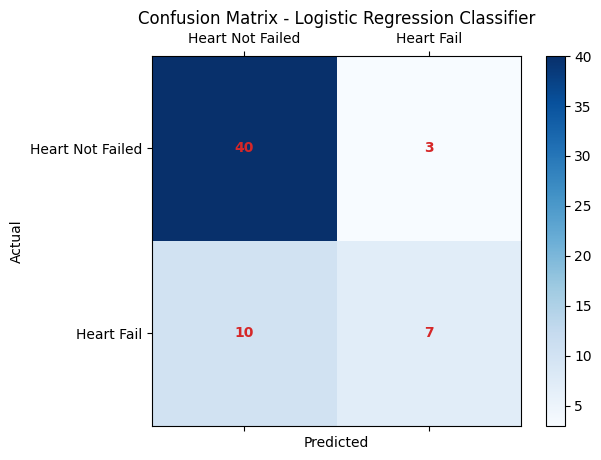

In [24]:
plot_confusion_matrix(tp_lr, tn_lr, fp_lr, fn_lr, classifier='Logistic Regression Classifier')

### 2.3 - Second classifier - Random Forest Classifier

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to load the output of the model.

</div></div> 

In [25]:
# We give the output of the model but if you want in the future you can test it by yourself

# rf_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
# rf_clf.fit(x_train, y_train)
# rf_pred = rf_clf.predict(x_test)

rf_pred = np.array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])
rf_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.3.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Compute the accuracy of the random forest classifier

Complete the cell below.
</div></div> 

In [26]:
rf_acc = accuracy_score(ground_truth, rf_pred) # SOLUTION
print(f"Random Forest Accuracy: {round(rf_acc,3)*100}%")

Random Forest Accuracy: 73.3%


 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.3.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
 Compute the confusion matrix of the random forest classifier

Complete the cell below.
</div></div> 

In [27]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_confusion_matrix(ground_truth, rf_pred) # SOLUTION

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Execute the cell below to visualize the confusion matrix.

</div></div> 

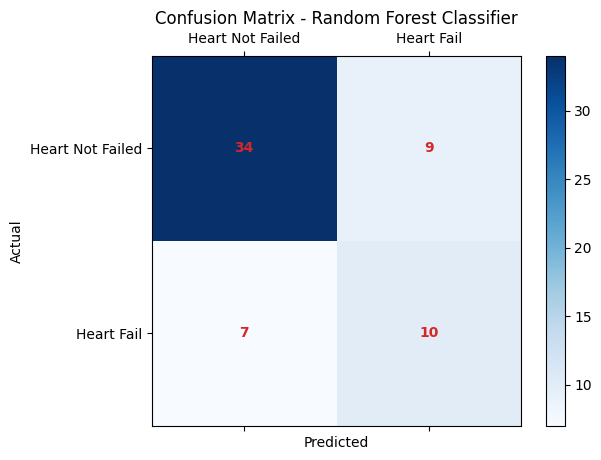

In [28]:
plot_confusion_matrix(tp_rf, tn_rf, fp_rf, fn_rf, classifier='Random Forest Classifier')

### 2.4 - Interpretation

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.1 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">
        
Which model has the best accuracy?  
Assign the variable `best_accuracy` below a value of 1 for the first model (logistic regression) and 2 for the second model (random forest). Example: `best_accuracy = 1` or `best_accuracy = 2`.

Complete the cell below.
</div></div> 

In [29]:
best_accuracy = 1 # SOLUTION

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.2 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">

What is the meaning of a false positive in this context? 
- 1. The heart is predicted to fail but actually doesn't
- 2. The heart is predicted to fail and actually fails
- 3. The heart is predicted not to fail but actually fails
- 4. The heart is predicted not to fail and actually doesn't        

Assign the variable `false_positive_meaning` below a value of 1 for the first statement, 2 for the second statement, 3 for the third statement, 4 for the fourth statement. Example: `false_positive_meaning = 1` or `false_positive_meaning = 2` or `false_positive_meaning = 3` or `false_positive_meaning = 4`.

Complete the cell below.
</div></div> 

In [30]:
false_positive_meaning = 1 # SOLUTION

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.3 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">

What are the consequences of a false positive in this context (1 sentence)?     

Complete the cell below.
</div></div> 

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.4 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">

What is the meaning of a false negative in this context?  
- 1. The heart is predicted to fail but actually doesn't
- 2. The heart is predicted to fail and actually fails
- 3. The heart is predicted not to fail but actually fails
- 4. The heart is predicted not to fail and actually doesn't

Assign the variable `false_negative_meaning` below a value of 1 for the first statement, 2 for the second statement, 3 for the third statement, 4 for the fourth statement. Example: `false_negative_meaning = 1` or `false_negative_meaning = 2` or `false_negative_meaning = 3` or `false_negative_meaning = 4`.

Complete the cell below.
</div></div> 

In [31]:
false_negative_meaning = 3 # SOLUTION

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.5 (1 point)</p>
    <div style="padding: 0 0 2px 10px;">

What are the consequences of a false negative in this context (1 sentence)?

Complete the cell below.
</div></div> 

 <div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Question 2.4.6 (2 points)</p>
    <div style="padding: 0 0 2px 10px;">

If you were to choose a classifier, what would be the argument for the first one? For the second one? What is the dilemma here? Provide numerical data to support your answer based on the metrics you calculated above (3-4 sentences).

Complete the cell below.
</div></div> 

<div style="border-left: 6px solid rgba(200, 60, 60, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(200, 60, 60, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Final instructions</p>
    <div style="padding: 0 0 2px 10px;">

Congratulations on finishing this first graded assignment!

Make sure to **save your work** either by clicking on the floppy icon (💾) at the top of the notebook, clicking on the menu `File > Save Notebook` or by using the keyboard shortcut `Ctrl+S`.

Then go to the [moodle page of the course](https://moodle.epfl.ch/course/view.php?id=18548) to submit your work. 


</div></div>